In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
train_data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\titanic-dataset\train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\titanic-dataset\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
class3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_3 = sum(class3)/len(class3)
print("% of Class 3 who survived:", rate_3*100,"%")

% of Class 3 who survived: 24.236252545824847 %


In [6]:
class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_2 = sum(class2)/len(class2)

print("% of Class 2 who survived:", rate_2*100,"%")

% of Class 2 who survived: 47.28260869565217 %


In [7]:
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_1 = sum(class1)/len(class1)

print("% of Class 1 who survived:", rate_1*100,"%")

% of Class 1 who survived: 62.96296296296296 %


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [9]:
dataset = pd.concat([train_data], ignore_index=True, sort=False)

Text(0.5, 1.0, 'Missing values heatmap')

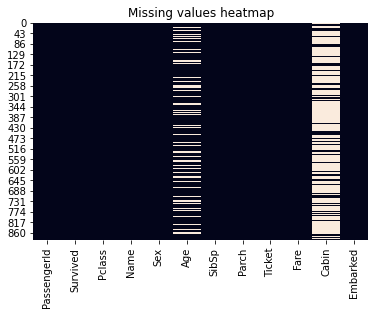

In [10]:
dataset.isnull().sum
sns.heatmap(dataset.isnull(), cbar=False).set_title('Missing values heatmap')

In [11]:
dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
dataset['Family'] = dataset.Parch + dataset.SibSp
test_data['Family'] = test_data.Parch + test_data.SibSp
test_data.replace(r'^\s*$', np.nan, regex=True)
test_data.Fare.fillna(test_data.Fare.median(skipna = True), inplace = True)
for i in range(len(dataset['Family'])):
    if (dataset.Family[i] == 0):
        dataset['Is_Alone'] = 0
    else:
        dataset['Is_Alone'] = 1

In [13]:
dataset['Fare_Category'] = pd.cut(dataset['Fare'],bins=[-1000,7.90,14.45,31.28,1200],
                                  labels=[0,1,2,3])
test_data['Fare_Category'] = pd.cut(test_data['Fare'],bins=[-1000,7.90,14.45,31.28,1200],
                                  labels=[0,1,2,3])

In [14]:
dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace=True)

In [15]:
dataset.Cabin = dataset.Cabin.fillna('NA')

In [16]:
dataset['Salutation'] = dataset.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
grp = dataset.groupby(['Sex','Pclass'])

In [17]:
grp.first()

PassengerId  Survived  \
Sex    Pclass                          
female 1                 2         1   
       2                10         1   
       3                 3         1   
male   1                 7         0   
       2                18         1   
       3                 1         0   

                                                            Name   Age  SibSp  \
Sex    Pclass                                                                   
female 1       Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1   
       2                     Nasser, Mrs. Nicholas (Adele Achem)  14.0      1   
       3                                  Heikkinen, Miss. Laina  26.0      0   
male   1                                 McCarthy, Mr. Timothy J  54.0      0   
       2                            Williams, Mr. Charles Eugene  35.0      0   
       3                                 Braund, Mr. Owen Harris  22.0      1   

               Parch            Ticket     Fare Cabin Embarked  Family  \
Sex    Pclass                                                            
female 1           0          PC 17599  71.2833   C85        C       1   
       2           0            237736  30.0708    NA        C       1   
       3           0  STON/O2. 3101282   7.9250    NA        S       0   
male   1           0             17463  51.8625   E46        S       0   
       2           0            244373  13.0000    NA        S       0   
       3           0         A/5 21171   7.2500    NA        S       1   

               Is_Alone Fare_Category Salutation  
Sex    Pclass                                     
female 1              0             3        Mrs  
       2              0             2        Mrs  
       3              0             1       Miss  
male   1              0             3         Mr  
       2              0             1         Mr  
       3              0             0         Mr

In [18]:
grp.Age.apply(lambda x: x.fillna(x.median()))
dataset.Age.fillna(dataset.Age.median, inplace = True)
test_data.Age.fillna(test_data.Age.median, inplace = True)
test_data.Fare.fillna(test_data.Fare.median, inplace = True)

In [19]:
from sklearn.preprocessing import LabelEncoder
dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex'])
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Is_Alone,Fare_Category,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,S,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,3,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,S,0,0,1,Mr


In [20]:
pd.get_dummies(dataset.Embarked, prefix='Emb', drop_first=False)

,Emb_C,Emb_Q,Emb_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [21]:
dataset.drop(['PassengerId', 'Cabin',
              'Name','Salutation', 'Ticket','Embarked', 
              'SibSp', 'Parch', 'Age', 'Is_Alone'], axis=1, inplace=True)
dataset.head()

,Survived,Pclass,Sex,Fare,Family,Fare_Category
0,0,3,1,7.2500,1,0
1,1,1,0,71.2833,1,3
2,1,3,0,7.9250,0,1
3,1,1,0,53.1000,1,3
4,0,3,1,8.0500,0,1


In [22]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,2,1


Text(0.5, 1.0, 'Missing values heatmap')

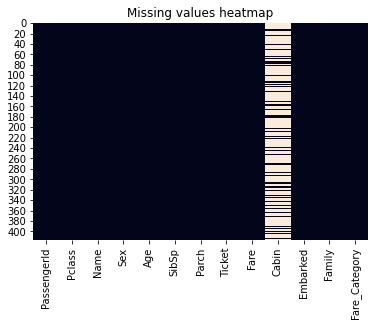

In [23]:
sns.heatmap(test_data.isnull(), cbar=False).set_title('Missing values heatmap')

In [24]:
from sklearn.ensemble import RandomForestClassifier
train_data.head()
train_data.dropna()
y = dataset["Survived"]
features = ['Sex','Pclass','Fare_Category','Family']
x_train = pd.get_dummies(dataset[features])
x_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(criterion='entropy',n_estimators=700, max_depth=20, 
                               min_samples_split=10, min_samples_leaf=1, max_features='auto',
                               oob_score=True, random_state=1, n_jobs=-1)
model.fit(x_train,y)
train_predictions = model.predict
predictions = model.predict(x_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived':predictions})
output.to_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\my_submission.csv',index=False)
print('Submission Saved Succesfully')

Submission Saved Succesfully
